In [1]:
from IPython.core.display import HTML

HTML("""
    <link rel="stylesheet" href="../fonts/cmun-bright.css">
    <style type='text/css'>
        * {
            font-family: Computer Modern Bright !important;
        }
    </style>
""")

<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 7.5 Some nomenclature

# 7.6 Comparing the two ‘dialects’

Matlab like `plt` vs OO interface

In [2]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

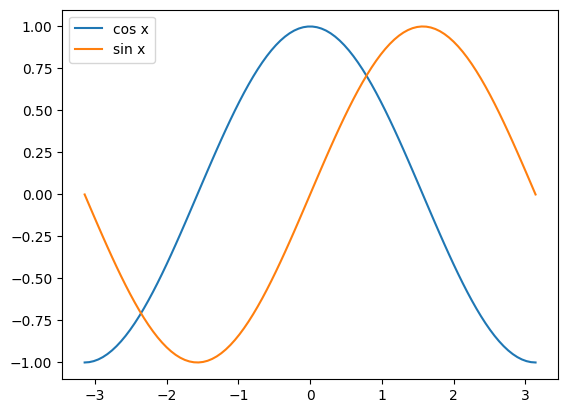

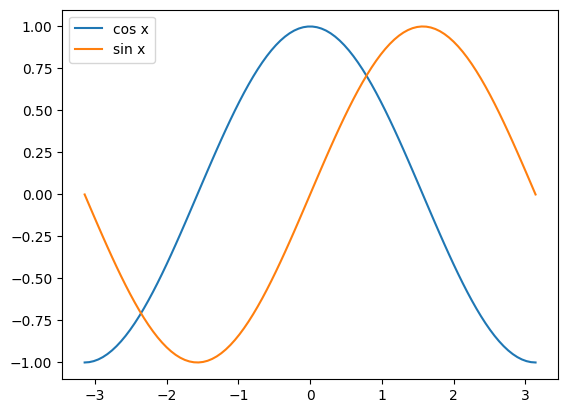

In [3]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

### OO Interface

it's all `ax`

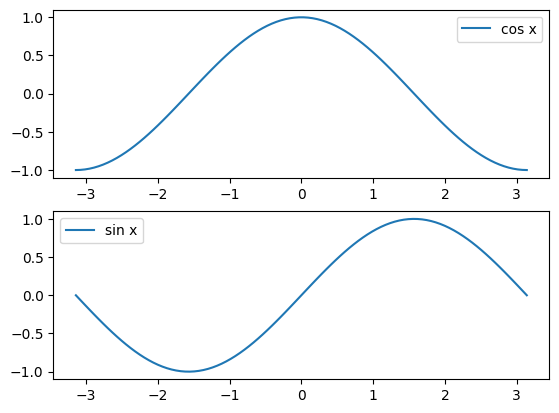

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

plt.show()

always have been

# 7.7 What is OO ax, really?

Checking details...

In [5]:
print(type(ax))

print(ax.shape)

print(type(ax[0]))

<class 'numpy.ndarray'>
(2,)
<class 'matplotlib.axes._axes.Axes'>


which is also why `numpy` is a dependency for `matplotlib`

# 7.8 A complete OO example

A summary guide to creating plots using OO using the example provided in the notes as an example:

1. **Set up the figure and axes**:
   - Initialize a figure with a specified size using `plt.figure(figsize=(width, height))`.
   - Create a grid of subplots with two rows and one column, sharing the x-axis using `fig, ax = plt.subplots(2, 1, sharex=True)`.

2. **Plotting**:
   - Access each subplot by indexing into the `ax` array, e.g., `ax[0]` for the first subplot and `ax[1]` for the second.
   - Plot the data on each axis using the appropriate methods like `ax[i].plot()` or `ax[i].scatter()`.

3. **Fill between**:
   - Use the `ax[i].fill_between()` method to add a shaded region to the plots.

4. **Draw the legends and grids**:
   - Iterate over each `ax` using a for loop to set the legend and grid using `ax[i].legend()` and `ax[i].grid()`.

5. **Labeling**:
   - Set the y-axis labels for each subplot with `ax[i].set_ylabel('label')`.
   - Label the x-axis only on the bottom subplot using `ax[1].set_xlabel('label')` since the x-axis is shared.

6. **Add a super title and adjust layout**:
   - Add a super title to the figure with `fig.suptitle('title')`.
   - Call `fig.tight_layout()` to adjust the layout of the subplots.

7. **Displaying the plot**:
   - Show the plot with `plt.show()`.

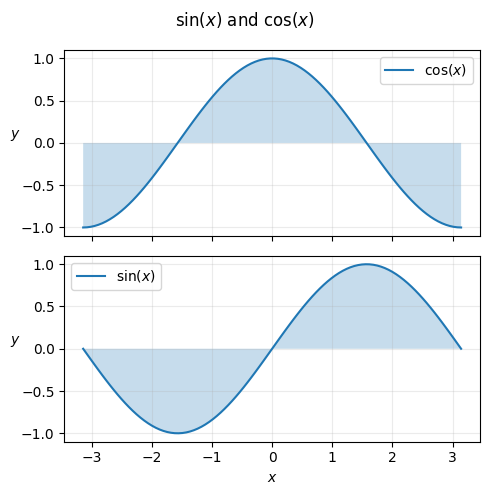

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

# 7.9 Multiple rows and columns

### Using ax

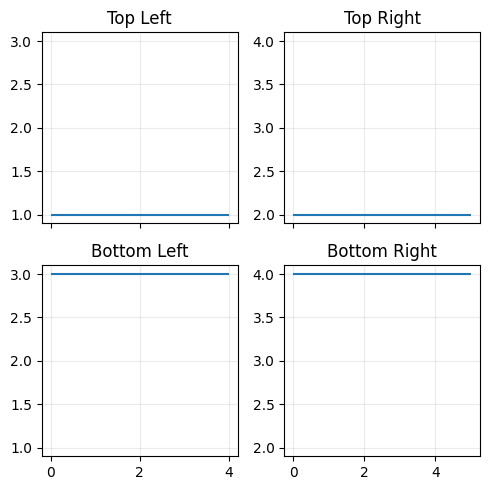

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()
# # or more exhaustively
# top_left=ax[0, 0]
# top_right=ax[0, 1]
# bottom_left=ax[1, 0]
# bottom_right=ax[1, 1]

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 7.9.1 Sharing axes

through `sharex` and `sharey`

| Option | Result                                |
|--------|---------------------------------------|
| `True` | Makes all the axes use the same range.|
| `col`  | Use the same range for all the columns|
| `row`  | Use the same range for all the rows   |

`sharex` -- shared $x$-axis range

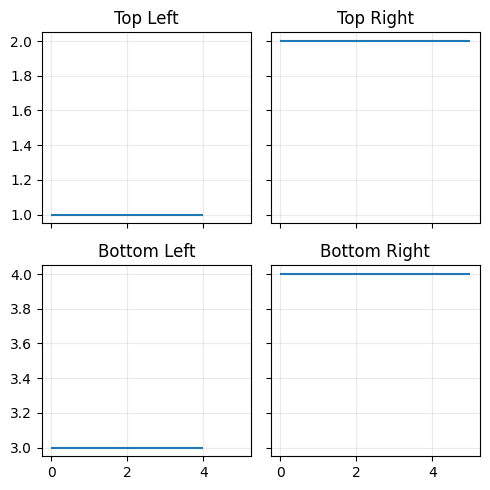

In [8]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

`sharey` -- shared $y$-axis range

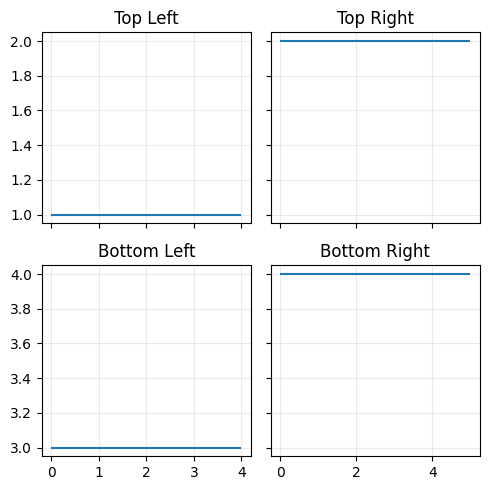

In [9]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 7.9.2 Accessing all axes

As how we can unpack all the axes using the `.flatten()` method, we can too use it to address all axes as follows! e.g.
```
    for a in ax.flatten():
        a.grid(alpha=.25)
```

# 7.10 Other useful plots

## 7.10.1 Histograms

### Data

where we can define a helper function `get_plot_data()` to work through the data for us!

The data obtained has the following structure

| sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv | sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv |
|---------------------------------------------------------------|-------------------------------------------------------------|
| basic_monthly_mean                                             | basic_monthly_mean                                           |
| 3701                                                          | 2741                                                        |
| 2850                                                          | 3057                                                        |
| 3053                                                          | 3098                                                        |
| 3557                                                          | 2960                                                        |
| 3494                                                          | 3404                                                        |
| 2952                                                          | 2740                                                        |
| 3235                                                          | 3065                                                        |
| 3326                                                          | 3350                                                        |
| 3091                                                          | 3933                                                        |


### A quick helper function

In [10]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

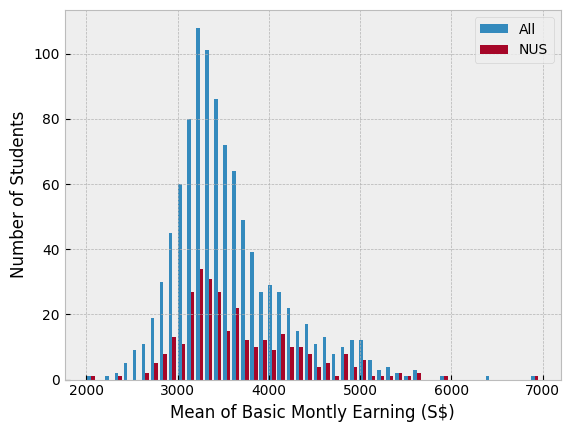

In [11]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 7.10.2 Scatter plots

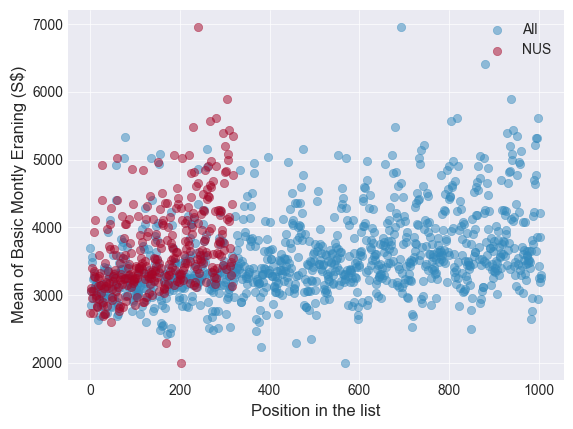

In [12]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 7.10.3 Bar charts

Text(0, 0.5, 'Number of Students')

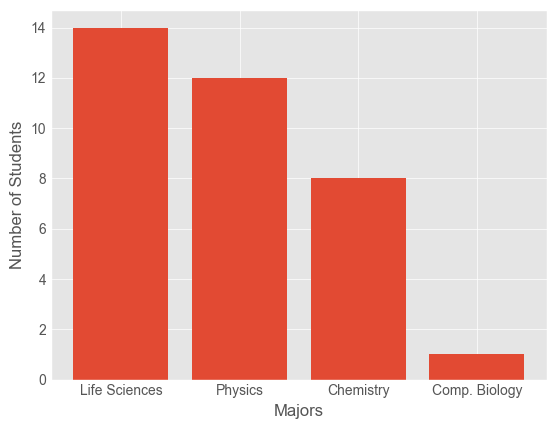

In [13]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 7.10.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

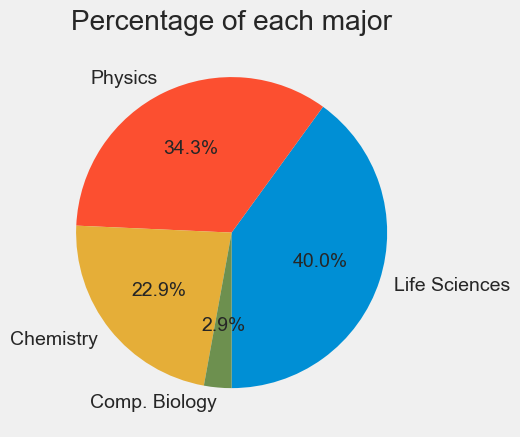

In [14]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')

# Footnotes
Referenced [Plotting (Good)](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/2_plotting_good.html)